เราจะสร้าง Machine Learning เรียนรู้จากข้อมูล x, y ที่ให้มา เพื่อทำ Linear Regression สร้างฟังก์ชันขึ้นมาใหม่ ที่สามารถทำงานสร้าง Output ได้ใกล้เคียงข้อมูลตัวอย่าง โดยใช้วิธี Stochastic Gradient Descent (SGD) Optimization

# 0. Import Library

Import Library ที่จะจำเป็น

In [1]:
%matplotlib inline
from fastai.basics import *

# 1. Generate x

สร้างข้อมูล x เป็นเลข 0 ถึง 29 เอาไว้เป็นข้อมูล input ให้ฟังก์ชัน จะได้เอาไว้พล็อตกราฟดู

* Column แรก เป็นเลข 0 - 29 เอาไว้คุณกับความชัน (x<sub>1</sub>)
* Column ที่สองเป็น เลข 1, 1, 1, ... อย่างเดียว เอาไว้คุณกับจุดตัด จะได้คงค่าจุดตัดไว้เหมือนเดิม (x<sub>0</sub> เป็น 1 เสมอ)

ลองดู x ใน 10 แถวแรก

In [2]:
n = 30
x = torch.ones(n, 2)
x[:,0] = torch.arange(n, out=torch.FloatTensor())
x[:10]

tensor([[0., 1.],
        [1., 1.],
        [2., 1.],
        [3., 1.],
        [4., 1.],
        [5., 1.],
        [6., 1.],
        [7., 1.],
        [8., 1.],
        [9., 1.]])

# 2. สมมติโจทย์

สมมติ โจทย์ คือ สมการเส้นตรง y = mx + b โดยที่ m = 2 และ b = 5 เราใส่ค่า x ตั้งแต่ 0-49 จะได้ค่า y ดังนี้

In [3]:
y = (2. * x[:, 0]) + 5.
y

tensor([ 5.,  7.,  9., 11., 13., 15., 17., 19., 21., 23., 25., 27., 29., 31.,
        33., 35., 37., 39., 41., 43., 45., 47., 49., 51., 53., 55., 57., 59.,
        61., 63.])

นำมาพล็อตกราฟ จะได้กราฟเส้นตรง ความชัน เท่ากับ 2 จุดตัดแกน y เท่ากับ 3

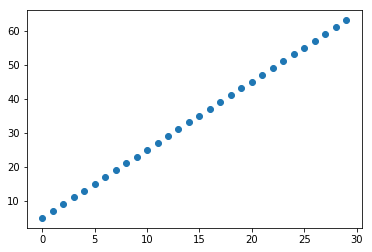

In [4]:
plt.scatter(x[:,0], y)

## 2.1 เพิ่ม Noise

เพื่อให้เหมือนข้อมูลในโลกความเป็นจริง เราจะใส่ noise เข้าไปในข้อมูล จะได้เพิ่มความยากขึ้นอีกนิดนึง โดย noise จะอยู่ในช่วง -5 ถึง 5

In [5]:
noise = (torch.rand_like(y) * 10.) - 5.
noise

tensor([ 3.5190,  2.1365,  0.3311,  0.7394, -4.5411,  3.8121, -0.6082, -1.5352,
        -0.2564,  0.8442, -4.4565, -2.7278, -4.9926,  2.7733, -0.0726, -1.3456,
        -0.1553,  0.1859, -3.9688, -3.6053,  4.2746, -0.4361,  4.9386, -2.0178,
        -1.1521, -0.6356,  1.4427,  3.6667, -4.9746, -4.3233])

นำ noise มาใส่ใน y

In [6]:
y = y + noise
y

tensor([ 8.5190,  9.1365,  9.3311, 11.7394,  8.4589, 18.8121, 16.3918, 17.4648,
        20.7436, 23.8442, 20.5435, 24.2722, 24.0074, 33.7733, 32.9274, 33.6544,
        36.8447, 39.1859, 37.0312, 39.3947, 49.2746, 46.5639, 53.9386, 48.9822,
        51.8479, 54.3644, 58.4427, 62.6667, 56.0254, 58.6767])

พล็อตกราฟดูจะเห็นว่า ข้อมูลมีความเหมือนจริงมากขึ้น แต่ก็ยังดูเป็นเส้นตรงอยู่

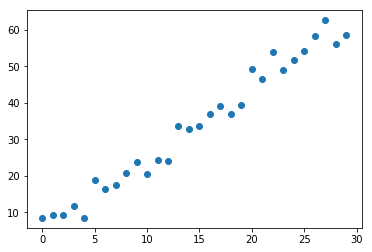

In [7]:
plt.scatter(x[:,0], y)

# 3. Loss Function

เรามากำหนด loss function ด้วยฟังก์ชัน Mean Squared Error คือการนำ yhat (y hat) ที่เราคำนวนได้ และ y ของจริง มาลบกัน แล้วยกกำลังสอง เพื่อให้เครื่องหมายลบหายไป และหาค่าเฉลี่ยของทั้งหมด

In [8]:
def mse(yhat, y): 
    return ((y-yhat)**2).mean()

# 4. Linear Regression

เราจะสร้างฟังก์ชันเส้นตรงขึ้นมา 1 ฟัง์ชัน เพื่อให้ทำงานนี้ y = mx + b โดยสุ่มค่าเริ่มต้น m, b ขึ้นแล้ว แล้วค่อย ๆ ปรับไปทีละนิด เรียกว่า Linear Regression

## 4.1 Initialization

สมมติว่าเราไม่รู้โจทย์ ไม่รู้มาก่อนว่า ค่า m และ b คืออะไร เราเห็นแต่ข้อมูล x และ y เราจะสมมติให้ค่าเริ่มต้นของโมเดลของเราเป็น m = -5 และ b = 4

In [9]:
a = tensor([-2., 4.])

# 5. yhat

นำมาคูณกับ x ออกมาเป็น yhat

In [10]:
yhat = x @ a
yhat

tensor([  4.,   2.,   0.,  -2.,  -4.,  -6.,  -8., -10., -12., -14., -16., -18.,
        -20., -22., -24., -26., -28., -30., -32., -34., -36., -38., -40., -42.,
        -44., -46., -48., -50., -52., -54.])

แล้วนำมาพล็อตกราฟเทียบกัน ระหว่าง y และ yhat

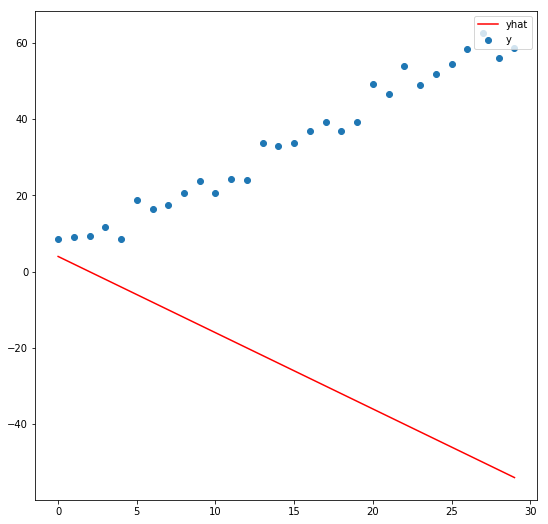

In [11]:
fig,ax = plt.subplots(figsize=(9, 9))
ax.scatter(x[:,0], y, label="y")
ax.plot(x[:,0], yhat, label="yhat", color='red')
ax.legend(loc='upper right')

นำ yhat และ y มาคำนวน loss ด้วย mse 

In [12]:
loss = mse(yhat, y)
loss

tensor(4608.6182)

# 6. Training Loop

ประกาศให้ a เป็น Parameter คือจะให้ระบบคำนวน หา Gradient ให้อัตโนมัติ requires_grad=True

In [13]:
a = torch.nn.Parameter(a)
a

Parameter containing:
tensor([-2.,  4.], requires_grad=True)

กำหนดฟังก์ชัน สำหรับคำนวน yhat, loss แล้วอัพเดท a ด้วย การลบด้วย Gradient (a.grad) * Learning Rate (lr) เรียกว่า Stochastic Gradient Descent (SGD)

*print loss, ค่า a, และ ค่า a.grad*

In [14]:
def update():
    yhat = x @ a
    loss = mse(yhat, y)
    loss.backward()
    with torch.no_grad():
        if i % 10 == 0: print(f"loss={loss}, a={a.data}, a.grad={a.grad}")
        a.sub_(lr * a.grad)        
        a.grad.zero_()

# 7. เทรนไป 100 Epoch

กำหนดค่า lr แล้ววน Loop เทรน ให้อัพเดท a ไปเรื่อย ๆ โดยดูข้อมูล x, y ทั้งหมด 100 รอบ เรียกว่า 100 Epoch

In [15]:
lr = 1e-4
for i in range(100):
    update()

loss=4608.6181640625, a=tensor([-2.,  4.]), a.grad=tensor([-2290.6702,  -117.1239])
loss=1425.3255615234375, a=tensor([-0.2173,  4.0913]), a.grad=tensor([-1271.2822,   -65.2427])
loss=444.8338623046875, a=tensor([0.7721, 4.1422]), a.grad=tensor([-705.5342,  -36.4491])
loss=142.8307647705078, a=tensor([1.3212, 4.1707]), a.grad=tensor([-391.5508,  -20.4689])
loss=49.81008529663086, a=tensor([1.6259, 4.1867]), a.grad=tensor([-217.2937,  -11.5999])
loss=21.158428192138672, a=tensor([1.7950, 4.1958]), a.grad=tensor([-120.5832,   -6.6776])
loss=12.333200454711914, a=tensor([1.8888, 4.2012]), a.grad=tensor([-66.9100,  -3.9457])
loss=9.614725112915039, a=tensor([1.9409, 4.2044]), a.grad=tensor([-37.1222,  -2.4294])
loss=8.777199745178223, a=tensor([1.9698, 4.2064]), a.grad=tensor([-20.5902,  -1.5877])
loss=8.519026756286621, a=tensor([1.9858, 4.2077]), a.grad=tensor([-11.4152,  -1.1205])


สังเกต loss ลดลงอย่างรวดเร็ว ค่า a ก็เข้าใกล้ โจทย์

# 8. Inference

นำโมเดลที่เราเทรนได้ มาใช้จริง ด้วยการคำนวน yhat จาก a ที่เราเทรนได้ 

In [16]:
yhat = x@a

พล็อตกราฟเปรียบเทียบ หลังเทรนเรียบร้อยแล้ว

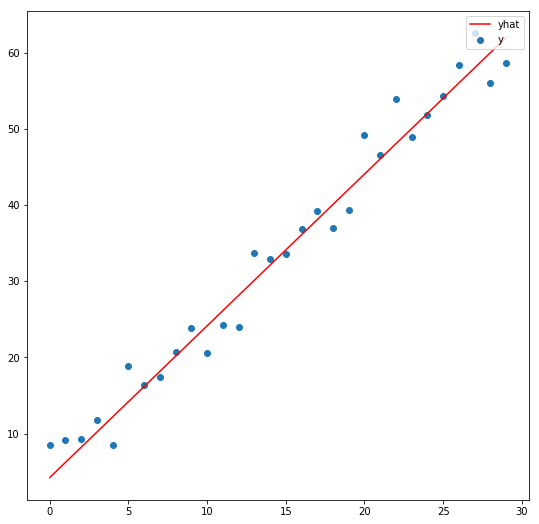

In [17]:
fig,ax = plt.subplots(figsize=(9, 9))
ax.scatter(x[:,0], y, label="y")
ax.plot(x[:,0], yhat, label="yhat", color='red')
ax.legend(loc='upper right')

เราจะได้ค่า a ดังนี้ ใกล้เคียงกับโจทย์ โดยที่เราเรียนรู้จากข้อมูล x, y เท่านั้น

In [18]:
a

Parameter containing:
tensor([1.9947, 4.2087], requires_grad=True)

# 9. สรุป

1. นี่เป็นตัวอย่างแบบง่ายที่สุด ซับซ้อนน้อยที่สุด เราสามารถ เพิ่ม Parameter จาก 2 ตัวเป็นร้อย พัน ไปจนถึง หลายล้านตัว สร้างฟังก์ชันที่ซับซ้อนมากขึ้นได้
1. ในการอัพเดท Parameter มีอัลกอริทึมที่จะช่วยให้ Converge เร็วขึ้นได้อีกมากกว่า แค่ SGD ตรง ๆ
1. เวลาเราเทรนข้อมูลจริง ๆ มักจะแบ่งข้อมูล ป้อนให้โมเดล ทีละ mini-batch ไม่ได้ป้อนทีเดียวหมดแบบนี้